Lucas Oliveira Machado de Sousa

# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

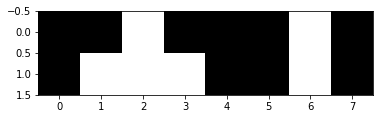

In [ ]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1 


Énergie globale:

$U(x) = \sum_{c \in C} V_c(x)$

In [ ]:
def computeEnergy(img, Beta, connexity=4):
  if(connexity not in [4, 8]):
    print("ERR: connexity must be either 4 or 8")

  U = 0
  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      if row != img.shape[0]-1:
        U+= Beta if (img[row][col] != img[row+1][col]) else 0
      if col != img.shape[1]-1:
        U+= Beta if (img[row][col] != img[row][col+1]) else 0
      if connexity == 8 and row != img.shape[0]-1 and col != img.shape[1]-1:
        U+= Beta if (img[row][col] != img[row+1][col+1]) else 0
  return U

print("L'énergie globale est égale a", computeEnergy(imaU, Beta=1, connexity=4), "* Beta")

L'énergie globale est égale a 10 * Beta


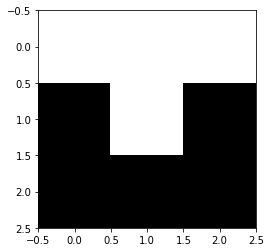

In [ ]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


$Pr(X_s = x_s / V_s) = \dfrac{1}{Z^s} exp({-U_s(x_s, V_s)})$

#A2
La réponse de cette question peut être observée dans la sortie du code ci-dessous.

In [ ]:
def computeConditionalEnergy(region, pixelValue, Beta = 1, connectivity=8, cliques=None):
  img = np.copy(region)
  img[1][1] = pixelValue
  if not cliques:
    if(connectivity == 4):
      img[0][0], img[0][2], img[2][0], img[2][2] = pixelValue, pixelValue, pixelValue, pixelValue
    return (np.sum(img != pixelValue))*Beta
  else:
    energy = 0
    for clique in cliques:
      i, j, val = clique[0], clique[1], clique[2]
      energy += (region[i][j] != pixelValue) * Beta * val;
    return energy

energy0 = computeConditionalEnergy(imaVois, 0)
energy1 = computeConditionalEnergy(imaVois, 1)

print("L'énergie conditionnel pour la valeur 0 est:", energy0, "* Beta")
print("L'énergie conditionnel pour la valeur 1 est:", energy1, "* Beta")

print("\nLa probabilité conditionnel pour la valeur 0 est de 1/Zs * exp(", -energy0, "* Beta)" )
print("La probabilité conditionnel pour la valeur 1 est de 1/Zs * exp(", -energy1, "* Beta)" )

print("\nDonc, c'est plus probable que le pixel s ait la valeur", 0 if energy0 < energy1 else 1)


L'énergie conditionnel pour la valeur 0 est: 3 * Beta
L'énergie conditionnel pour la valeur 1 est: 5 * Beta

La probabilité conditionnel pour la valeur 0 est de 1/Zs * exp( -3 * Beta)
La probabilité conditionnel pour la valeur 1 est de 1/Zs * exp( -5 * Beta)

Donc, c'est plus probable que le pixel s ait la valeur 0


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



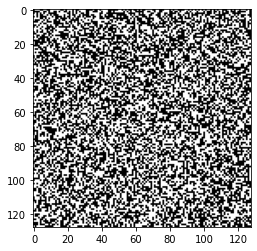

In [ ]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [ ]:
def echan(im_bin, beta_reg, cliques=None, connectivity=4):

    i = 0;
    j = 0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1 = (i-1)%im_bin.shape[0]
            i2 = (i+1)%im_bin.shape[0]
            j1 = (j-1)%im_bin.shape[1]
            j2 = (j+1)%im_bin.shape[1]

            reg = [[im_bin[i1][j1], im_bin[i1][j], im_bin[i1][j2]],
                  [im_bin[i][j1], im_bin[i][j], im_bin[i][j2]],
                  [im_bin[i2][j1], im_bin[i2][j], im_bin[i2][j2]]]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = computeConditionalEnergy(reg, pixelValue=0, Beta=beta_reg, connectivity=connectivity, cliques=cliques)
            p0 = math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = computeConditionalEnergy(reg, pixelValue=1, Beta=beta_reg, connectivity=connectivity, cliques=cliques)
            p1 = math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1 != 0.):
                if(random.uniform(0,1) < p0/(p0+p1)):
                    im_bin[i,j] = 0
                else :
                    im_bin[i,j] = 1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

<Figure size 432x288 with 0 Axes>

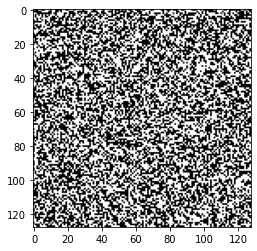

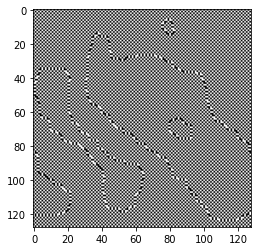

Text(0.5, 1.0, 'Difference from one image to the previous one')

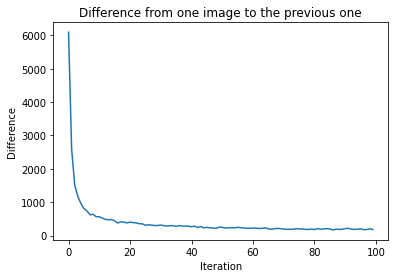

In [ ]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg=-20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()
 
difference = []
for n in range(100):  
    im1 = np.copy(im_bin)
    echan(im_bin,beta_reg) 
    im2 = np.copy(im_bin)
    difference.append(np.sum(np.logical_xor(im1, im2)))
    #plt.imshow(im_bin)      
    #mafigure.canvas.draw()
    #plt.show(block=False)

plt.figure()
plt.imshow(im_bin)
plt.show()

plt.plot(difference)
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Difference from one image to the previous one')

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

Non. À chaque itération, la valeur de chaque pixel est déterminée par une probabilité associée aux pixels du voisinage, donc c'est un processus probabiliste, pas déterministe.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

#A4

Au fin des N itérations on a une image avec des grandes régions de même couleur. Le plus grande la valeur de $\beta$, le plus vite ces grandes régions de même couleurs grandissent et les régions plus petites disparaîtrent.
Pour des valeurs très petites de $\beta$, même après plusieurs itérations on continue en ayant plusieurs pixels "seuls" (au milieu des pixels d'autres couleurs)

#Q5 
Which image minimizes the overall energy for this model? 

#A5

Pour ce modèle l'image qui minimise l'énérgie globale est une image où tous les pixels ont la même couleur (soit blanc soit noir).

In [ ]:
im_blanche = np.ones((128,128))
im_noire = np.zeros((128,128))

print("L'énergie pour l'image blanche est: ", computeEnergy(im_blanche, Beta=1, connexity=4))
print("L'énergie pour l'image noire est: ", computeEnergy(im_noire, Beta=1, connexity=4))

L'énergie pour l'image blanche est:  0
L'énergie pour l'image noire est:  0


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6

L'image résultant semble un échiquier (pas parfait). Comme on a changé le signe de l'énergie, la méthode utilisé va maximiser l'énergie de l'image au lieu de la minimiser, et un échiquier est l'image qui maximise l'énergie globale en 4-connexité.

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





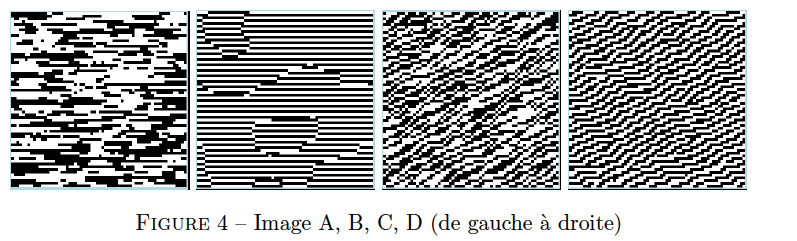

## A7

On sait que si la valeur d'un clique est positif les pixels du clique ont tendence d'avoir la même couleur après successifs itérations du méthode, et si la valeur d'un clique est négatif les pixels ont tendence d'avoir couleurs différentes. 

Sur l'image A, on voit l'alternance des couleurs verticalement, donc on a un clique en direction verticale $V(x_s, x_t) = \beta 1_{x_s \neq x_t}, \beta = -1$.

Sur l'image B, on voit homogeneité horizontale et alternance verticale. En partant du cas de l'image A, il faut seulement ajouter une clique horizontale $V(x_s, x_t) = \beta 1_{x_s \neq x_t}, \beta = 1$. 

Sur l'image C on voit se former un motif diagonal. Si $\beta$ est négatif, on sait qui ce motif vient d'une alternance diagonale $V(x_s, x_t) = \beta 1_{x_s \neq x_t}, \beta = -1$.

Sur l'image D, le motif diagonal est plus régulier, donc il faut équilibrer la clique diagonale antérieure avec une autre clique sur l'autre diagonale.

On peut voir les images générées ci-dessous.

In [ ]:
def generateImg(cliques, beta=1, iterations=10):
  plt.set_cmap('gray')
  sh=[64,64]
  im_bin=2-np.ceil(2*np.random.rand(*sh))

  mafigure=plt.figure()
  plt.imshow(im_bin);        
  mafigure.canvas.draw()
  plt.show()
  
  for n in range(iterations):  
    echan(im_bin, beta, cliques) 

  plt.figure()
  plt.imshow(im_bin)
  plt.show()

Image A: Beta négatif, clique horizontale


<Figure size 432x288 with 0 Axes>

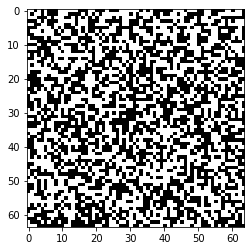

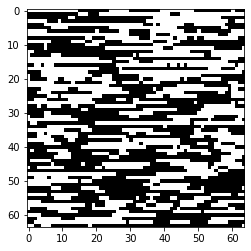

In [ ]:
print("Image A: Beta négatif, clique horizontale")
cliques = [[1,0,-1]]
generateImg(cliques, beta=-2, iterations=20)


Image B: Ajouter une clique verticale


<Figure size 432x288 with 0 Axes>

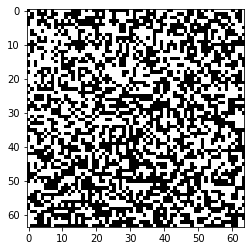

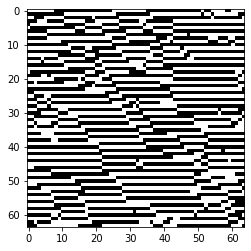

In [ ]:
print("\nImage B: Ajouter une clique verticale")
cliques = [[1,0,-1], [0,1,1]]
generateImg(cliques, beta=-2, iterations=20)


Image C: Ajouter une clique diagonale


<Figure size 432x288 with 0 Axes>

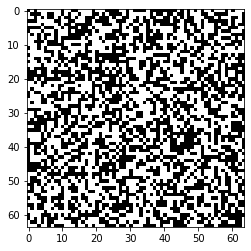

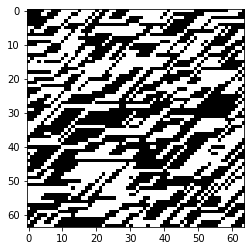

In [ ]:
print("\nImage C: Ajouter une clique diagonale")
cliques = [[1,0,-1], [0,1,1], [0,2,-1]]
generateImg(cliques, beta=-2, iterations=50)


Image C: Ajouter une clique verticale


<Figure size 432x288 with 0 Axes>

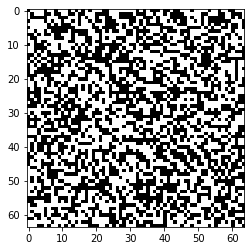

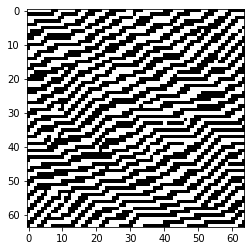

In [ ]:
print("\nImage D: Ajouter une autre clique diagonale pour équilibrer")
cliques = [[1,0,-1], [0,1,1], [0,2,-1], [0,0,1]]
generateImg(cliques, beta=-2, iterations=20)

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

#A8

On peut voir ci-dessous qu'en général la diagonale est respecté, mais il y a encore des motifs pas reguliers sur l'image (comme dans le cas où on a utilisé un Beta négatif avec la 4-connexité, dans l'exercice 2)


Image C: Ajouter une autre clique diagonale pour équilibrer


<Figure size 432x288 with 0 Axes>

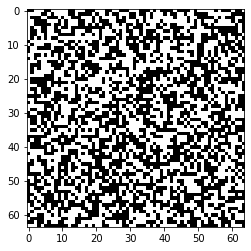

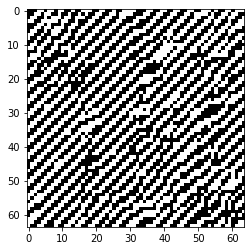

In [ ]:
print("\nUtilisation seulement des cliques diagonaux")
cliques = [[0,2,-1], [0,0,1]]
generateImg(cliques, beta=-2, iterations=20)